In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
import zipfile

In [2]:
#Load rawdata
#type: bipartite graph

archive = zipfile.ZipFile("ca-IMDB.zip", 'r')
IMDB_rawdata = StringIO(str(archive.read('ca-IMDB.edges'), 'utf-8'))
IMDB_rawdata_df = pd.read_csv(IMDB_rawdata, 
                              sep=" ",
                              names=["Movie", "Actor"])

IMDB_rawdata_df = IMDB_rawdata_df.head(50)

In [3]:
#Create graph

IMDB_graph = nx.DiGraph()
IMDB_graph.add_nodes_from(IMDB_rawdata_df["Movie"], bipartite=0)
IMDB_graph.add_nodes_from(IMDB_rawdata_df["Actor"], bipartite=0)
IMDB_graph.add_edges_from(tuple(x) for x in IMDB_rawdata_df.values)

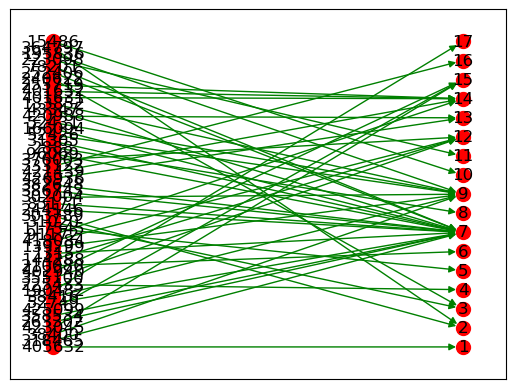

In [4]:
pos = nx.drawing.layout.bipartite_layout(IMDB_graph, IMDB_rawdata_df["Movie"])
nx.draw_networkx(IMDB_graph, pos, with_labels=True, node_size=100, node_color='r', edge_color='g', arrowsize=10)